## Optimization Methods, Homework №1 - Demidov Andrei

### Task 1
#### Solution:

Let's suppose that $r$ is the radius and $h$ is the height of a circular cylindrical can. The surface area of the can in this case is:
$$
S = 2  \pi  r^2 + 2 \pi r h
$$

Using the formula of volume, $V = \pi r^2 h$, we can derive the the $h$ to make the formula of surface area be dependent of one variable - $r$:
$$
h = \frac{V}{\pi r^2}
$$

Then,

$$
S = 2  \pi  r^2 + \frac{2 V}{r}
$$

We need to find the derivative of surface by radius:

$$
\frac{dS}{dr} = 4 \pi r - \frac{2 V}{r^2} = 0
$$

$$
2 \pi r^3 - V = 0 \Rightarrow r = \sqrt[3]{\frac{V}{2 \pi}}
$$

Using the derived formula for $h$, it is easy to see that
$$
h = 2\sqrt[3]{\frac{V}{2 \pi}}
$$

Answers:

$$
r = \sqrt[3]{\frac{V}{2 \pi}}
$$

$$
h = 2\sqrt[3]{\frac{V}{2 \pi}}
$$

### Task 2
#### Solution:

Using the theory of function's optimization, we need to find the first and the second derivatives of the provided function:

$$
\frac{df}{dx_1} = 3 x_1 + (1 + a) x_2 - 1 = 0
$$
$$
\frac{df}{dx_2} = 3 x_2 + (1 + a) x_1 - 1 = 0
$$

Deriving $x_1$ from a partial derivative, we get:
$$
x_1 = \frac{1}{3}(1 - (1+a)x_2)
$$
Then we can derive formula for $x_2$ using formula for $x_1$: 
$$
x_2 = \frac{1 - \frac{1}{3}(1+a)}{3 - \frac{1}{3}(1+a)^2}
$$

The numerator can be equal to zero:
$$
1 - \frac{1}{3}(1+a) = 0 \Rightarrow a = 2
$$

The denominator should not be equal to zero:
$$
3 - \frac{1}{3}(1+a)^2 \neq 0 \Rightarrow a^2 + 2a - 8 = 0 \Rightarrow a \in set(2, -4)
$$

Calculations of the second derivatives:

$$
A=\frac{d^2f}{d^2x_1} = 3
$$
$$
C=\frac{d^2f}{d^2x_2} = 3
$$
$$
B=\frac{d^2f}{dx_1dx_2} = 1 + a
$$

To find the global minimum, we need the following constraints:
$$
AC - B^2 > 0
$$
$$
A > 0
$$
Hence, 
$$
9 - (1+a)^2 > 0 \Rightarrow -4 < a < 2
$$

$Answer:  a \in (-4,2), b \in \mathbb{R}$

## Task 3

In [1]:
import math
import numpy as np
from collections import Counter

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
# %matplotlib notebook


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def mishra_bird_function(v):
    return np.sin(v[1]) * np.exp((1-np.cos(v[0])) ** 2) + np.cos(v[0]) * np.exp((1-np.sin(v[1])) ** 2) + (v[0] - v[1]) ** 2


In [3]:
import matplotlib as mpl
from matplotlib import ticker, lines, cm, colors, patches
import matplotlib.pyplot as plt

def plot_simplex(pts, ax, color):
    l1 = lines.Line2D(
        np.concatenate([pts[:, 0], np.array([pts[0, 0],])]),
        np.concatenate([pts[:, 1], np.array([pts[0, 1],])]),
        color = color,
    )
    ax.add_line(l1)
    
    # draw the actual points
    plot = ax.scatter(pts[:, 0], pts[:, 1], color = color)
    return ax

def plot_sample():
    cmap = mpl.cm.cool

    fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(15,15))
    fig
    n = 1000
    pts = np.random.random(size = (n, 3, 2))
    colors = cmap(np.linspace(0, 10, n))
    for i in range(iter_):
        ax[0] = plot_simplex(draw_points[i], ax[0], color = colors[i])
    ax[0].set_title("Triangle Visualization, iterations = {}".format(iter_))
    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    ax[0].grid(True)
    ax[1].set_title("Values")
    ax[1].set_xlabel('Iterations')
    ax[1].set_ylabel('Function value')
    ax[1].set_ylim(0, -120)
    ax[1].plot(range(iter_), f_val[:iter_])
    fig.show()


In [4]:
def triangle_metric(a1, a2, a3):
    return np.sum(np.abs(a1 - a2) + np.abs(a1-a2) + np.abs(a2 - a3))

In the nelder-mead algorithm I use the following condition to stop:
If the sum of three sides of the simplex is too small that means that the initial simplex was transformed to the point which is the global minimum. Using this approach, there is an opportunity to adjust a parameter which is described the smalliness of a triangle.

In [5]:
def nelder_mead(f, x0, eps=1e-12, alpha=1.0, beta=0.5, gamma=2.0):
    
#     alpha = 1.0 # reflection
#     beta = 0.5 # expansion
#     gamma = 2.0 # contraction
    pts = np.zeros((10000,3,2))
    v1 = np.array(x0)
    v2 = v1 + np.array([1.0, 0.0])
    v3 = v1 + np.array([0.0, 1.0])
    values = []
#     v1 = np.array([-3.0, -6.0])
#     v2 = np.array([-5.0, -3.0])
#     v3 = np.array([-1.0, -2.0])
    iterations = 0
    while True:
        dict_x_y = {
            f(v1): v1,
            f(v2): v2,
            f(v3): v3
        }
        
        sorted_by_value = sorted(dict_x_y.items(), key=lambda kv: kv[0])
#         print(sorted_by_value)

        xh = sorted_by_value[2][1]
        xg = sorted_by_value[1][1]
        xl = sorted_by_value[0][1]
#         print("XH is {}".format(xh))
#         print("best is {} and function is {}".format(w, mishra_bird_function(w)))

        xc = (xg + xl) / 2.0

        xr = (1 + alpha) * xc - alpha * xh
        if f(xr) < f(xl):
#             print("FIRST")
            xe = (1 - gamma) * xc + gamma * xr
#             xe = xc + gamma * (xr - xc)
            if f(xe) < f(xr):
                xh = xe
            else:
                xh = xr # !!!
        if f(xl) < f(xr) < f(xg):
#             print("SECOND")
            xh = xr
        if f(xg) < f(xr) < f(xh):
#             print("THIRD")
            temp = xr
            xr = xh
            xh = temp
            
            xs = beta * xh + (1 - beta) * xc
#             xs = xc + beta * (xh - xc)
            if f(xs) < f(xh):
                xh = xs
            else:
                xg = xl + (xg - xl) / 2.0
                xh = xl + (xh - xl) / 2.0
                
        if f(xh) < f(xr):
#             print("FORTH")
            xs = beta * xh + (1 - beta) * xc
#             xs = xc + beta * (xh - xc)
            if f(xs) < f(xh):
                xh = xs
            else:
                xg = xl + (xg - xl) / 2.0
                xh = xl + (xh - xl) / 2.0
                
        
        v1 = xh
        v2 = xg
        v3 = xl
        
        # If we leave the domain
        if (v1[0] + 5) ** 2 + (v1[1] + 5) ** 2 > 25:
            print("The dot is bad: ", v1)
            return
        if (v2[0] + 5) ** 2 + (v2[1] + 5) ** 2 > 25:
            print("The dot is bad: ", v2)
            return
        if (v3[0] + 5) ** 2 + (v3[1] + 5) ** 2 > 25:
            print("The dot is bad: ", v3)
            return
        
        pts[iterations] = [v1,v2,v3]
        value = f(xl)
        values.append(value)
        if triangle_metric(v1, v2, v3) < eps:
            print(v1,v2,v3)
            return xl, f(xl), iterations, pts, np.array(values)
        
        iterations += 1

### Subproblem 1 and 2
#### Let's try two dots and illustrate the following triangles during finding the minimum.

The following two examples show that for different initial points we can get different results. It is quite obvious because this method does not use the information about the gradients.

[-3.11417046 -1.63828927] [-3.11421695 -1.63861019] [-3.11419967 -1.63849071]
The global minimum of function at the point [-3.11419967 -1.63849071] with value -106.29392292093921 and on iteration 36


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


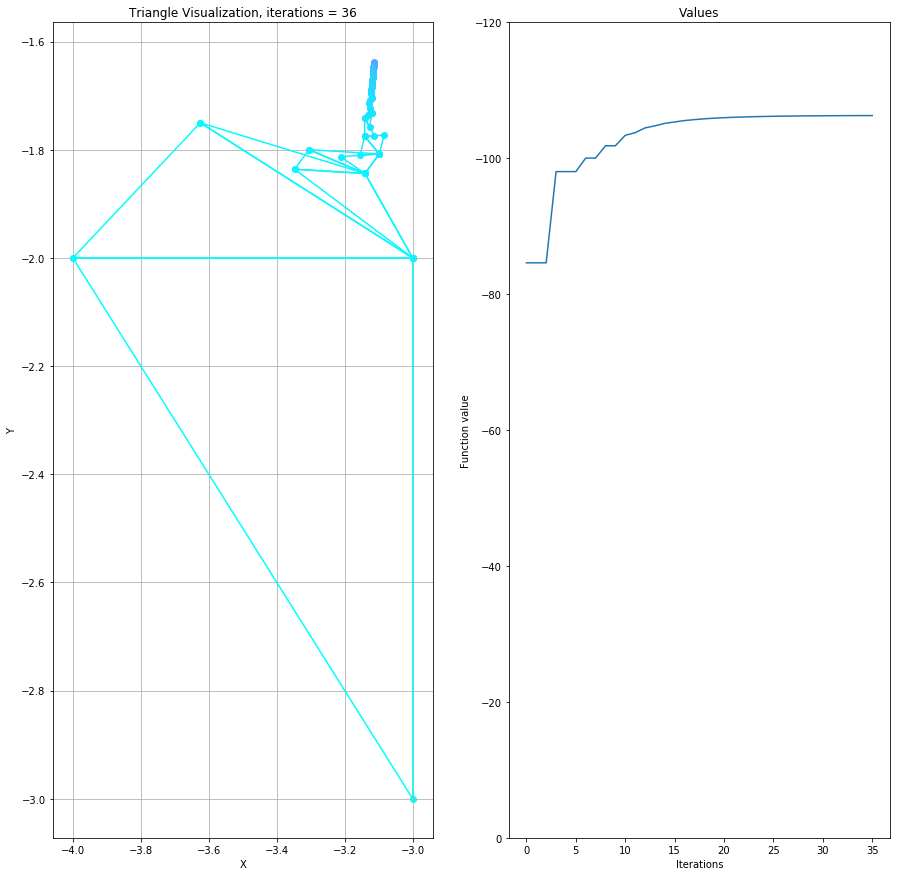

In [6]:
try:
    points, value, iter_, draw_points, f_val = nelder_mead(mishra_bird_function, [-3,-3],eps=1e-3, alpha=1.0, beta=0.5, gamma=2.0)
    print("The global minimum of function at the point {} with value {} and on iteration {}".format(points, value,iter_))
    plot_sample()
except TypeError:
    print("Wrong dot")

[-2.875 -2.25 ] [-2.875 -2.25 ] [-2.875 -2.25 ]
The global minimum of function at the point [-2.875 -2.25 ] with value -59.31192877682168 and on iteration 168


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


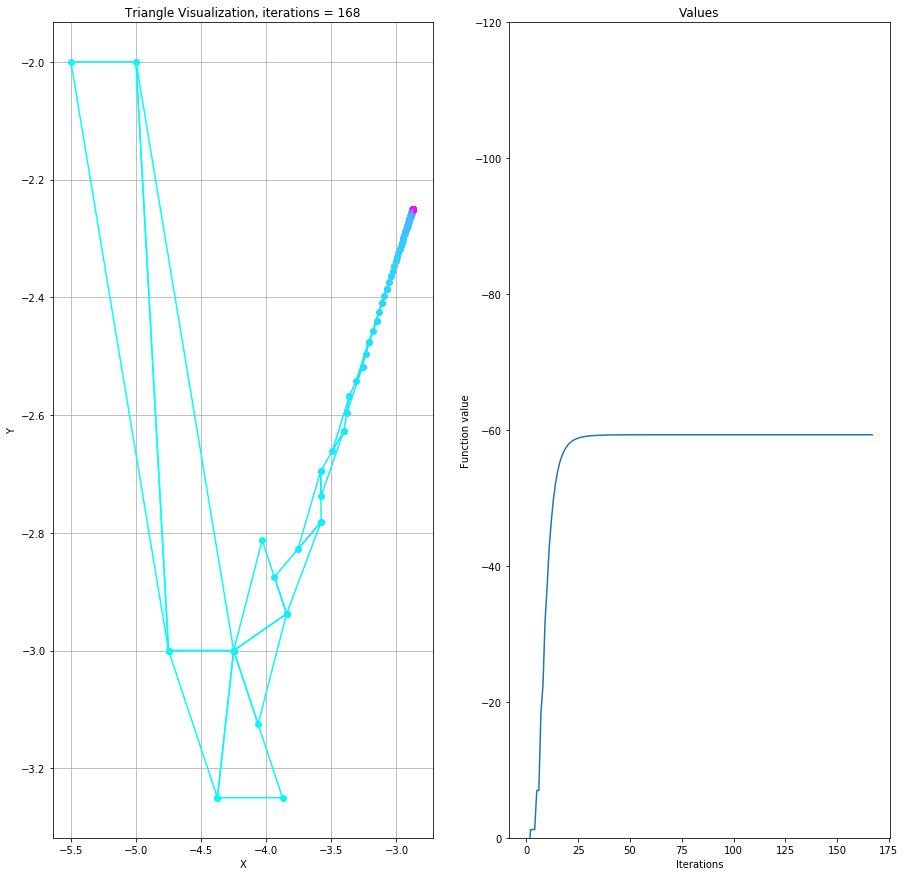

In [7]:
try:
    points, value, iter_, draw_points, f_val = nelder_mead(mishra_bird_function, [-6,-2])
    print("The global minimum of function at the point {} with value {} and on iteration {}".format(points, value,iter_))
    plot_sample()
except TypeError:
    print("Wrong dot")

### Subproblem 3
#### Let's try different parameters alpha, beta and gamma in method for the same points

[-3.13001491 -1.58190691] [-3.12986928 -1.58209666] [-3.12997416 -1.58214369]
The global minimum of function at the point [-3.12997416 -1.58214369] with value -106.76452653640439 and on iteration 21


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


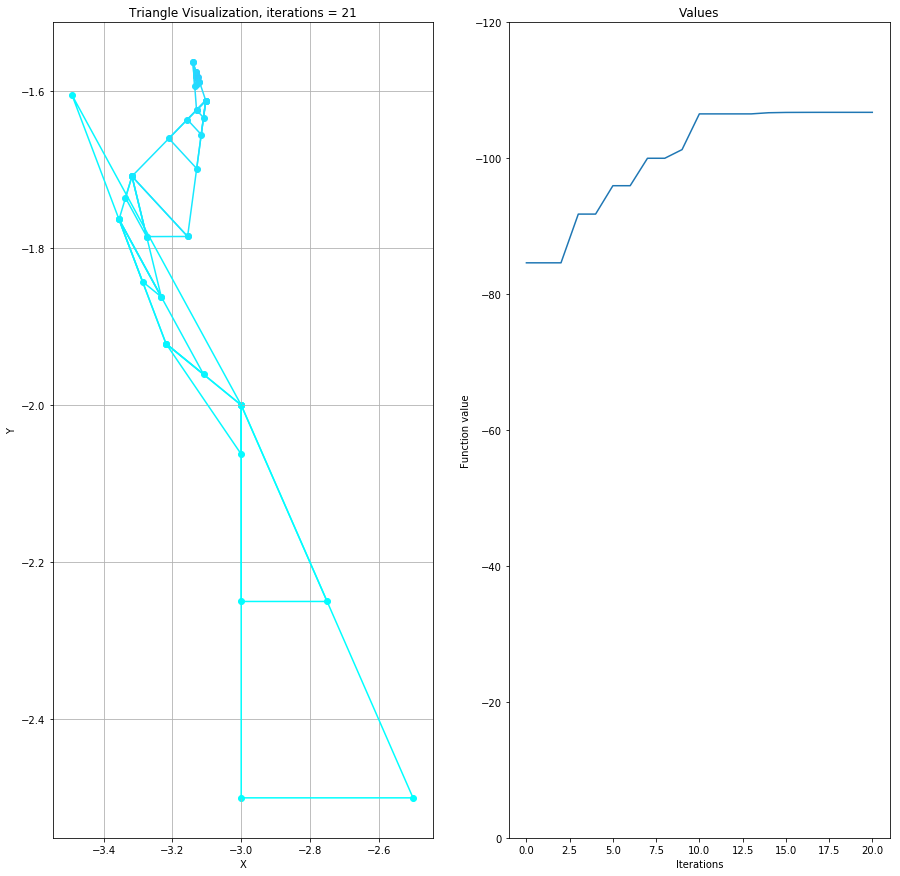

In [133]:
try:
    points, value, iter_, draw_points, f_val = nelder_mead(mishra_bird_function, [-3,-3], eps=1e-3, alpha=3.5, beta=34.0, gamma=9.0)
    print("The global minimum of function at the point {} with value {} and on iteration {}".format(points, value,iter_))
    plot_sample()
except TypeError:
    print("Wrong dot")

#### Conclusion: It seems that different values of parameters affect the number of iterations and the behavior of convergence.

[-3.26768875 -1.86803332] [-3.26780891 -1.86797036] [-3.26768494 -1.8680352 ]
The global minimum of function at the point [-3.26768494 -1.8680352 ] with value -94.15437254516597 and on iteration 25


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


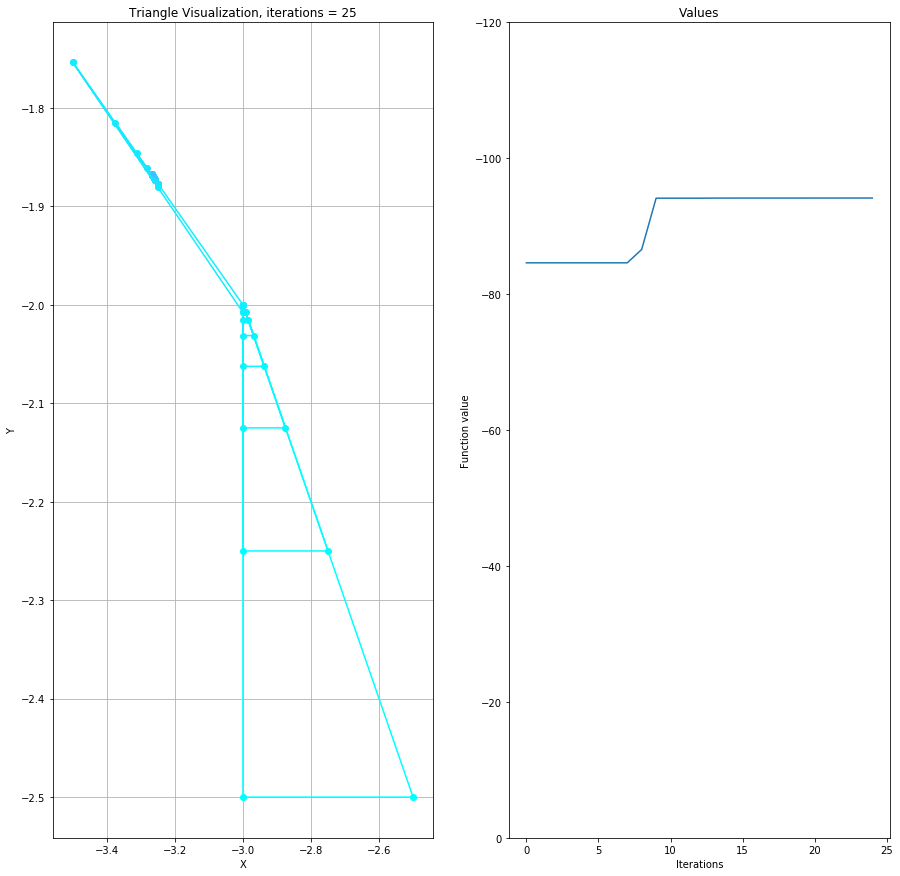

In [134]:
try:
    points, value, iter_, draw_points, f_val = nelder_mead(mishra_bird_function, [-3,-3], eps=1e-3, alpha=64.0, beta=33.5, gamma=52.0)
    print("The global minimum of function at the point {} with value {} and on iteration {}".format(points, value,iter_))
    plot_sample()
except TypeError:
    print("Wrong dot")

## Task 4

In [108]:
import random

def calculate_derivative_x(f,x,h=np.array([0.00001,0.0])):
#     print("X: ", f(x+h)-f(x))
    return (f(x+h)-f(x))/h[0]

def calculate_derivative_y(f,x,h=np.array([0.0,0.00001])):
#     print("Y: ", f(x+h)-f(x))
    return (f(x+h)-f(x))/h[1]


def random_coordinate_descent_(f, x, n_iter=1000, lr = 0.05):
    list_indexes = [0,1]
    eps = 1e-10
    grad_x = 0.0
    grad_y = 0.0
    alpha = np.array([lr, lr])
    f_prev = 0.0
    f_curr = 0.0
    for i in range(n_iter):
        choice = random.choice(list_indexes)
        if choice == 0:
            grad_x = calculate_derivative_x(f, x)
            x[0] = x[0] - alpha[0]/(i+1) * grad_x
#             alpha[0] /= (i+1)
        else:
            grad_y = calculate_derivative_y(f, x)
            x[1] = x[1] - alpha[1]/(i+1) * grad_y
#             alpha[1] /= (i+1)
#             print(alpha)
        if f_curr == 0.0:
            f_prev = f(x)
            f_curr = f(x)
        else:
            f_curr = f(x)
            if math.fabs(f_curr - f_prev) < eps:
                return x, f(x), i
            else:
                f_prev = f(x)
    return x, f(x), i

The random coordinate descent is very dependent on the learning rate and there are some strategies how we can select it. In this task, I select the following strategy:
$$
lr = \frac{0.05}{iterations+1}
$$

It is very important to note that the learning rate cannot be universal. That's why there is a need to select a determine learning rate for the determine task of optimization.

In [125]:
x_answer, f_val, num_iter = random_coordinate_descent_(mishra_bird_function, x=np.array([-3.0, -3.0]))

In [126]:
print("The global minimum of function at the point {} with value {} and on iteration {}".format(x_answer, f_val,num_iter))

The global minimum of function at the point [-3.13025247 -1.58214723] with value -106.76453674139577 and on iteration 22


Here we have 26 iterations to the global minimum. The amount of steps is very dependent on the initial point and the learning rate. So these parameters must be tuned.

We can see that the random gradient descent make the convergence faster than Nelder-Mead algorithm (39 iterations). The gradient descent has the parameters to tune. That's why this method is more appropriate for the optimization task.

For example, if we use the learning rate is equal to $1.0$ from the same point we can get the following result:

In [131]:
x_answer, f_val, num_iter = random_coordinate_descent_(mishra_bird_function, x=np.array([-3.0, -3.0]), lr=2.0)

In [132]:
print("The global minimum of function at the point {} with value {} and on iteration {}".format(x_answer, f_val,num_iter))

The global minimum of function at the point [-5.3777911  -5.61804888] with value 1.4870191596945113 and on iteration 893
